In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv')

In [4]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
netflix.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# check missing values

missing_values = netflix.isnull().sum()

In [8]:
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Data Cleaning

In [9]:
netflix_clean = netflix.dropna()

In [10]:
netflix_clean 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
netflix_clean_unique = netflix_clean.drop_duplicates()

In [12]:
netflix_clean_unique

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Summary Statistic

In [13]:
netflix_clean_unique.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [14]:
netflix_clean_unique.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
netflix_clean_unique['show_id'].value_counts()

show_id
s8       1
s6285    1
s6283    1
s6281    1
s6279    1
        ..
s3225    1
s3224    1
s3219    1
s3218    1
s8807    1
Name: count, Length: 5332, dtype: int64

In [16]:
netflix_clean_unique['type'].value_counts()

type
Movie      5185
TV Show     147
Name: count, dtype: int64

In [17]:
netflix_clean_unique['title'].value_counts()

title
Sankofa                             1
Benji's Very Own Christmas Story    1
Beneath the Leaves                  1
Below Her Mouth                     1
Being AP                            1
                                   ..
Evvarikee Cheppoddu                 1
Defiance                            1
Holiday Rush                        1
The Island                          1
Zubaan                              1
Name: count, Length: 5332, dtype: int64

In [18]:
netflix_clean_unique['director'].value_counts()

director
Raúl Campos, Jan Suter           18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Martin Scorsese                  12
                                 ..
Igor Kovalyov, Norton Virgien     1
Danny Cannon                      1
Mana Yasuda                       1
Gupse Özay                        1
Mozez Singh                       1
Name: count, Length: 3945, dtype: int64

In [19]:
netflix_clean_unique['cast'].value_counts()

cast
Samuel West                                                                                                                                                                                                        10
Jeff Dunham                                                                                                                                                                                                         7
Kevin Hart                                                                                                                                                                                                          6
Bill Burr                                                                                                                                                                                                           5
Jim Gaffigan                                                                                                                               

In [20]:
netflix_clean_unique['country'].value_counts()

country
United States                                   1846
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: count, Length: 604, dtype: int64

In [21]:
netflix_clean_unique['date_added'].value_counts()

date_added
January 1, 2020      92
March 1, 2018        67
November 1, 2019     67
December 31, 2019    64
October 1, 2018      60
                     ..
June 27, 2017         1
June 21, 2017         1
April 5, 2021         1
April 8, 2021         1
January 11, 2020      1
Name: count, Length: 1453, dtype: int64

In [22]:
netflix_clean_unique['release_year'].value_counts()

release_year
2017    657
2018    648
2016    577
2019    519
2020    442
       ... 
1946      1
1961      1
1942      1
1947      1
1944      1
Name: count, Length: 72, dtype: int64

In [23]:
netflix_clean_unique['rating'].value_counts()

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

In [24]:
netflix_clean_unique['duration'].value_counts()

duration
94 min     135
93 min     130
97 min     129
95 min     127
90 min     123
          ... 
189 min      1
229 min      1
237 min      1
214 min      1
191 min      1
Name: count, Length: 198, dtype: int64

In [25]:
netflix_clean_unique['listed_in'].value_counts()

listed_in
Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: count, Length: 335, dtype: int64

In [26]:
netflix_clean_unique['description'].value_counts()

description
When pretty new neighbor Seema falls for their shy roommate Sid, jealous womanizers Omi and Jai plot to break up the new lovebirds.                        2
Mistakenly accused of an attack on the Fourth Raikage, ninja Naruto is imprisoned in the impenetrable Hozuki Castle and his powers are sealed.             2
With their biggest foe seemingly defeated, InuYasha and his friends return to everyday life. But the peace is soon shattered by an emerging new enemy.     2
When Elastigirl gets recruited for a high-profile crime-fighting mission, Mr. Incredible takes on his toughest assignment ever: full-time parenting.       2
After devastating terror attacks in Norway, a young survivor, grieving families and the country rally for justice and healing. Based on a true story.      2
                                                                                                                                                          ..
When caste differences throw a wrench into the

Data Visualization

In [27]:
netflix_clean_unique.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

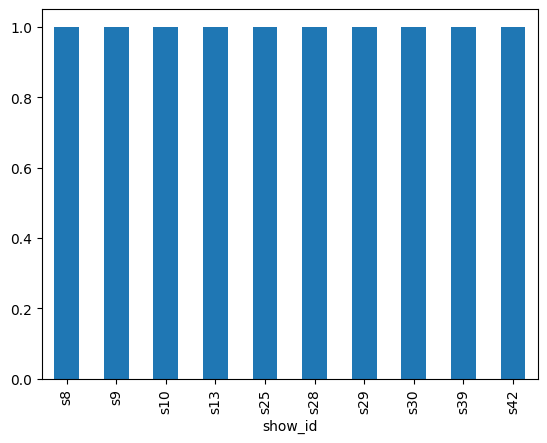

In [46]:
netflix_clean_unique['show_id'].head(10).value_counts().plot(kind='bar')
plt.show()

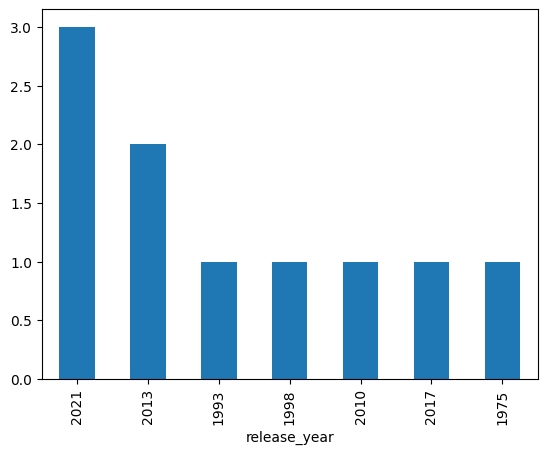

In [47]:
netflix_clean_unique['release_year'].head(10).value_counts().plot(kind='bar')
plt.show()

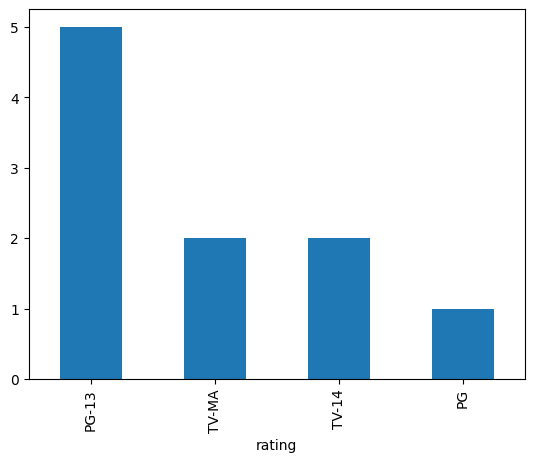

In [48]:
netflix_clean_unique['rating'].head(10).value_counts().plot(kind='bar')
plt.show()

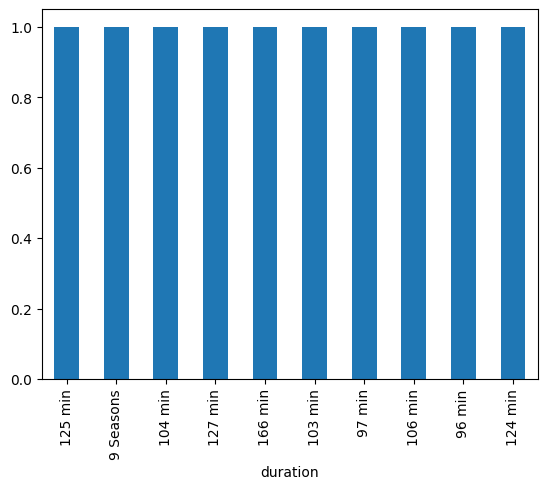

In [49]:
netflix_clean_unique['duration'].head(10).value_counts().plot(kind='bar')
plt.show()

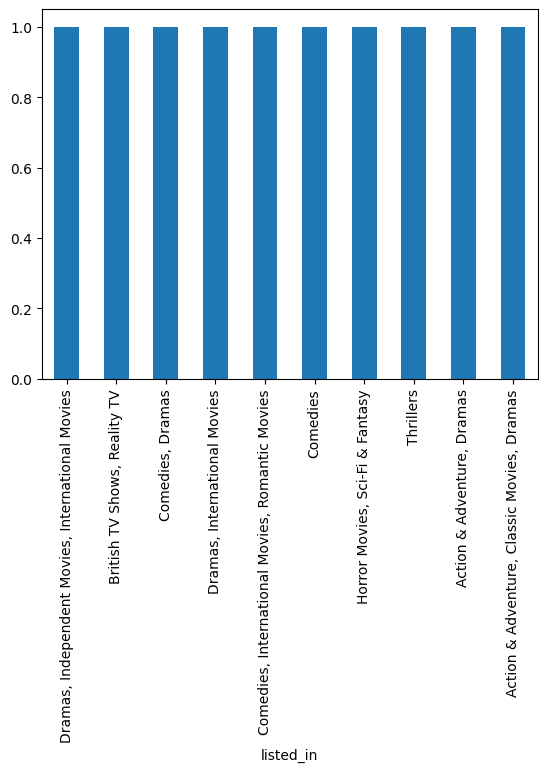

In [50]:
netflix_clean_unique['listed_in'].head(10).value_counts().plot(kind='bar')
plt.show()

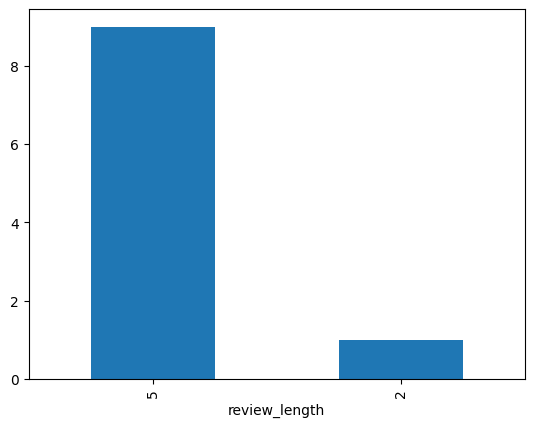

In [56]:
netflix_clean_unique['review_length'].head(10).value_counts().plot(kind='bar')
plt.show()

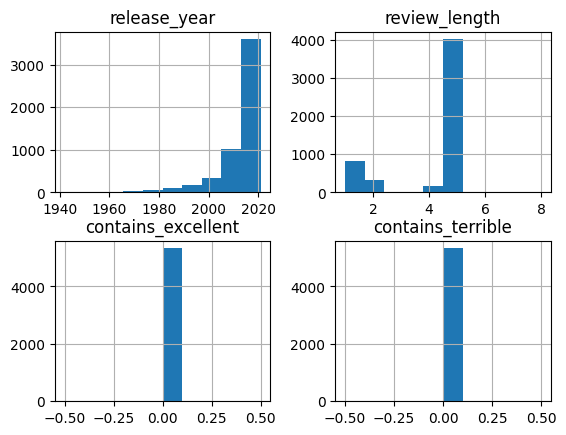

In [51]:
# histograms

netflix_clean_unique.hist()
plt.show()

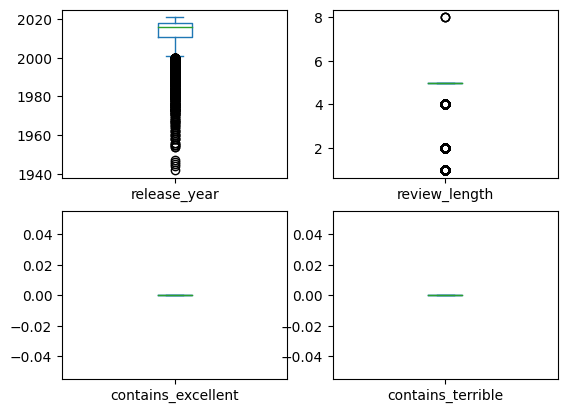

In [52]:
# box and whisker plots
netflix_clean_unique.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Calculate Movies and TV Show that people most watched

In [53]:
netflix_clean_unique.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'review_length', 'contains_excellent', 'contains_terrible'],
      dtype='object')

In [58]:
from scipy.stats import chi2_contingency

df = netflix_clean_unique

data = df

# Define a function to perform Chi-square test and print results
def perform_chi2_test(df, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    # Performing the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Printing results
    print(f"Chi-square test between {col1} and {col2}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\n")

# Perform Chi-square tests for specified relationships ( refer to columns )
perform_chi2_test(data, 'title', 'rating')
perform_chi2_test(data, 'country', 'rating')
perform_chi2_test(data, 'review_length', 'rating')

Chi-square test between title and rating:
Chi-square statistic: 69316.0
P-value: 0.485359429861165
Degrees of freedom: 69303


Chi-square test between country and rating:
Chi-square statistic: 12790.010295857552
P-value: 1.7020390003387133e-244
Degrees of freedom: 7839


Chi-square test between review_length and rating:
Chi-square statistic: 21328.0
P-value: 0.0
Degrees of freedom: 52




* Chi-square test between title and rating - There's likely not a strong association between the title of a Netflix show and its rating

* Chi-square test between country and rating - There's a VERY strong association between a show's country of origin and its rating. Viewers likely have different expectations or preferences based on where a show or movie is produced.

*  Chi-square test between review length and rating - There's a strong relationship between how long a review is and the rating a viewer gives.